In [5]:
#student_name:YonghengHou
#student_number:5556661
#login:yh790

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
import math
import random

DATA_PATH = "unique_m.csv" 

# read the full text file and store records in a pandas dataframe
pd_full_data_set = pd.read_csv(DATA_PATH)
 
# copy the dataframe into a new dataframe so it will not mess up the original data
pd_data_set = pd_full_data_set.copy() 
 
# calculate the number of instances, columns, attributes and actual class 
no_of_instances = len(pd_data_set.index) # number of rows
no_of_columns = len(pd_data_set.columns) # number of columns
no_of_attributes = no_of_columns - 1 #subtract class coulumn

 
# store class values in a column and then create a list of unique
# classes and store in a dataframe 
unique_class_list_df = pd_data_set.iloc[:,no_of_columns-1]

unique_class_list_df = unique_class_list_df.drop_duplicates()
 
#record the number of unique classes in the data set
num_unique_classes = len(unique_class_list_df)
 
# record the value for K, the number of clusters
K = num_unique_classes
 
# remove Class Column to create an unlabled data set
class_column_colname = pd_data_set.columns[no_of_columns-1]
pd_data_set = pd_data_set.drop(columns = class_column_colname) 

# convert dataframe into a numpy array
np_data_set = pd_data_set.to_numpy(copy=True)

#------------------------------------------------------
#here is to select 20% of data randomly to determine the initial cluster mean points
ratio=0.9
    
select_dataSet_number=int(ratio*len(np_data_set))
        
shuffled_indices=np.random.permutation(select_dataSet_number)
    
select_index=shuffled_indices[:select_dataSet_number]
    
select_data=np_data_set[select_index, :]

#------------------------------------------------------
#here is to find farthest point between the selected 20% dataset
"""
principles: 
1.we can view one instance as one point 
2.pass the 20% selected the data,then iterate each points of dataset.In each ietation,I calculate the max 
distance beween this point and other points by Euclidean distance ,then record the max point and row number
int the each_line_max array.After all iterations finished,the I select the number of top K points to intiaize
the centroids.

"""
def farthest_point_search(data, k):
    each_line_max=[]
    centroids=[]
    for row in range(0, len(data)):
        
            this_instance = np_data_set[row]
            
            max_distance = float(0)

            for row2 in range(0,len(data)):

                # Calculate the Euclidean distance from this instance to the
                distance = np.linalg.norm(data[row] - data[row2])

                # If we have a centroid that is more further to this instance,                
                if distance > max_distance:
                    
                    max_distance=distance                    
                    # Update the minimum distance
            #record the max for each line        
            each_line_max.append(max_distance)
    
    #select top K max distance centroids
    for i in range(0,k): 
        m = max(each_line_max)
        #extract index of max distance in the array
        a=[i for i, j in enumerate(each_line_max) if j == m]
        row=a[0]
        #add to my centroid array
        centroids.append(select_data[row].tolist()) 
        del each_line_max[row]
    
    return centroids 

centroid=farthest_point_search(select_data,K)
print("number of K :",K)
print("number of centroid :",len(centroid))
print("print the first centroid :",centroid[:1])                                  
#----------------------------------------------------


number of K : 1912
number of centroid : 1912
print the first centroid : [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 85.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.3]]


centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


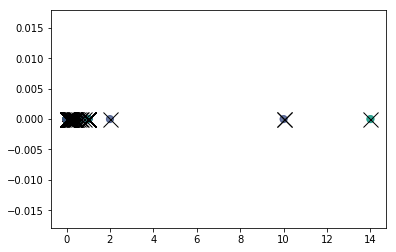

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


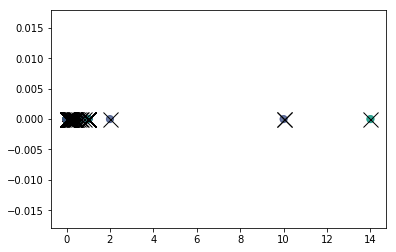

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


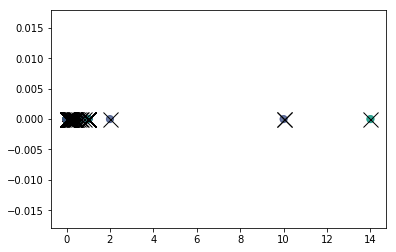

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


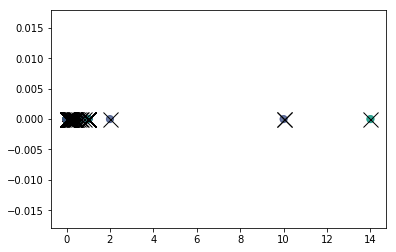

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


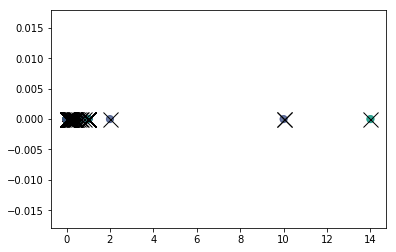

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


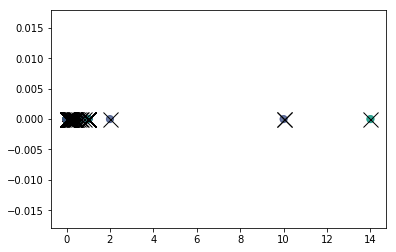

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


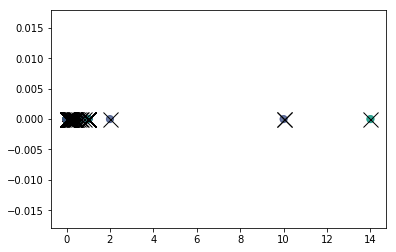

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


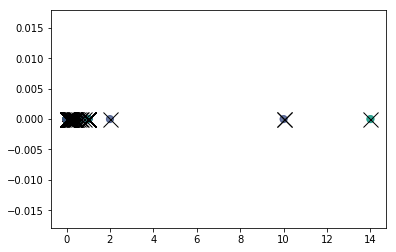

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


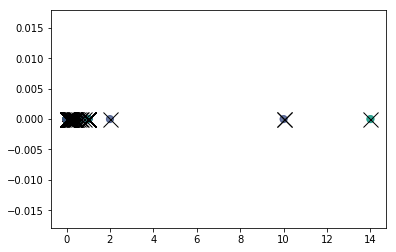

centroids [[0.   0.   0.   ... 0.   0.   3.3 ]
 [0.   0.   0.   ... 0.   0.   3.04]
 [0.   0.   0.   ... 0.   0.   5.8 ]
 ...
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]
 [ nan  nan  nan ...  nan  nan  nan]]


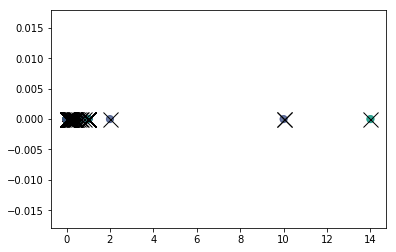

In [ ]:
points_n = no_of_instances
clusters_n = K
iteration_n = 100
#------------------start tensorflow-------------------------
"""

k-mean basicl principle:
 
Step1:
Calculate the Euclidean distance of each instance in the data set
from each of the centroids
Find the centroid with the minimum distance and assign the instance o that centroid.
Record that centroid in the cluster assignments array.

Step2:
Calculate the centroids of the clusters by computing the average of the attribute values of the instances in each cluster
Store the new centroids
update the old centroids

By iteratation of step1 and step2 to update the all cluster centroids until the centroids array is stable


"""
#declaree constant points,pass all dataset into,and set type:tf.float64
points = tf.constant(np_data_set,dtype=tf.float64)
#declaree variable centroids,pass all intialized centroids into,and set type:tf.float64
centroids = tf.Variable(centroid,dtype=tf.float64)

iterations=0
#set the maxiumn of iteration is 10 times
max_iterations = 10
while iterations < max_iterations:
    
    #Step1:
    #add one dimesion to calculate by distance
    points_expanded = tf.expand_dims(points, 0)
    #add one dimesion to calculate by distance
    centroids_expanded = tf.expand_dims(centroids, 1)
    
    # calculate the Euclidean distance from this instance to the centroid
    distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)

    #store instance to each cluster centroids,minmumn distance ,here is 0
    assignments = tf.argmin(distances, 0)

    #Step2:
    #by iterate each clusters ,to re-calcucate the centroid of the cluster
    means = []
    for c in range(clusters_n):
        means.append(tf.reduce_mean(
          tf.gather(points, 
                    tf.reshape(
                      tf.where(
                        tf.equal(assignments, c)
                      ),[1,-1])
                   ),reduction_indices=[1]))
    
    #record new centroids
    new_centroids = tf.concat(means, 0)
    #update old centroids
    update_centroids = tf.assign(centroids, new_centroids)
    iterations=iterations+1
    
    #run tensorflow
    
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
      sess.run(init)
      for step in range(iteration_n):
        [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, points, assignments])

      print("centroids", centroid_values)
    plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
    plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
    plt.show()

#----------------calculate silhouette coefficient ---------
"""
silhouette coefficient principle:

Silhouette coefficient is between 1 and -1. -1 means bad clustering, 1 means great clustering.
 
1. For each instance calculate the average distance to all other instances in that cluster. 
This is recorded as a.
2. (Find the average distance to all the instances in the nearest neighbor cluster). 
For each instance and any cluster that does not contain the 
instance calculate the average distance to all of the points in that other cluster. 
Then return the minimum such value over all of the clusters. This is recorded as b.
3. For each instance calculate the Silhouette Coefficient s,where s = (b-a)/max(a,b)

"""
#I record each distance between one point to other all points in the distance_each,store order is row order
distance_each =[]
#I record each distance_each in the distance_row,in order to calculate the sum next,then mean
distance_row=[]
for row in range(no_of_instances):
    for row2 in range(no_of_instances):
        distance_each.append(tf.reduce_sum(tf.square(tf.subtract(points[row], points[row2]))))
    distance_row.append(distance_each)

print("distance_row ",distance_row)    

#calculate the sum of all  distacnes
running_sum = []
for row in range(no_of_instances):
    running_sum.append(tf.reduce_sum(
      tf.gather(distance_row, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments[row], distance_row[row])
                  ),[1,-1])
               ),reduction_indices=[1]))

#calculate the mean as a
a=tf.reduce_mean(running_sum) 

#part of calculating b is not finshed yet ....



    

#-------------end--------------------------------------------
"""
for row in range(0, no_of_instances):
    this_instance=points[row]
    this_cluster = assignments[row]  
    a=tf.Variable(0.0,dtype=tf.float64)
    running_sum=tf.Variable(0.0,dtype=tf.float64)
    counter=tf.Variable(0.0,dtype=tf.float64)
    distance=tf.Variable(0.0,dtype=tf.float64)
    #running_sum=tf.Variable(0.0)
    one = tf.constant(1,dtype=tf.float64)
    print(a)
    for row_2 in range(0, no_of_instances):
        counter=tf.cond(tf.equal(this_cluster, assignments[row_2]), lambda: tf.add(counter, one), lambda: counter)
        distance=tf.cond(tf.equal(this_cluster, assignments[row_2]), lambda: tf.norm(tf.subtract(this_instance,points[row_2]),ord='euclidean'), lambda: distance)
        running_sum=tf.cond(tf.equal(this_cluster, assignments[row_2]), lambda: tf.add(running_sum, distance), lambda: running_sum)
                 
    a=tf.cond(tf.greater(counter, 0), lambda: tf.multiply(running_sum, counter), lambda: a)    
"""
                                                 
